# Assignment 4 (Week 4)

>**Note**: Late submissions are ***`penalized`***.

## Name: Ifeoluwa Oduwaiye

<br>

### Please show and display all your calculations and results.

In [8]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

### nb_black Installation And Usage

```bash
# On your command line, run:
pip install nb_black 
```


```python
# For jupyter notebook
%load_ext nb_black

# For jupyter lab
%load_ext lab_black
```


### Qs1

#### The data can be found [here](https://drive.google.com/file/d/1WFMBMR4e5o2B1rzDbOWaTorZRuKU3UOD/view?usp=share_link)

a.) Create a new column called **`Name`** from the **`Artist`** column. Return the name of the artist. \
e.g. \
`Tawaraya SÅtatsu, 17th century, Gold leaf and ink on paper`: `Tawaraya SÅ tatsu` \
`Artist Unknown, circa 190 BCE, Marble `: `Artist Unknown`


b.) Create a new column called **`Date`** from the `Artist` column which extracts the date/period
from the `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `1974` \
`Artist Unknown, 196 BCE, Granodiorite`: `196 BCE`

c.) Finally, Create a new column called **`Art_type`** by extracting values from `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `Woodblock print` \
`Artist Unknown, 196 BCE, Granodiorite`: `Granodiorite`

* To validate your results, find the **`unique values`** in **`each column`** you created.

In [9]:
df = pd.read_csv("/content/art.csv")
df.head(1)

,Name,Genuine,Category,Buy,Sell,Color 1,Color 2,Size,Real Artwork Title,Artist,Museum Description,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,HHA Set,Interact,Tag,Speaker Type,Lighting Type,Catalog,Filename,Internal ID,Unique Entry ID
0,academic painting,Yes,Wall-mounted,4980,1245,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianMan,12619,xfTf9sfyLkxHQEz4u


In [10]:
# 1a Enter your solution here

split_list = df.Artist.str.split(',')

name_list = []
for i in split_list:
  name_list.append(i[0])

df['name'] = name_list

In [11]:
df.name.value_counts()

Artist Unknown                   18
Leonardo da Vinci                 6
Tawaraya Sōtatsu                  4
Johannes Vermeer                  4
Hishikawa Moronobu                2
Diego Velázquez                   2
Pieter Brueghel the Elder         2
Tōshūsai Sharaku                  2
Édouard Manet                     2
Thutmose                          2
Sandro Botticelli                 2
Rembrandt van Rijn                2
Giuseppe Arcimboldo               2
Michelangelo                      2
Vincent van Gogh                  2
Itō Jakuchū                       2
Jean-François Millet              2
Thomas Gainsborough               2
Thomas Ridgeway Gould             1
Joseph Mallord William Turner     1
Arnold Böcklin                    1
Auguste Rodin                     1
Paul Cézanne                      1
Katsushika Hokusai                1
John Everett Millais              1
Georges Seurat                    1
Francisco de Goya                 1
Eugène Delacroix            

In [12]:
# 1b Enter your solution here

year_list = []
for i in split_list:
  year_list.append(i[1])

df['Date'] = year_list

In [13]:
df.Date.value_counts()

 17th century       6
 circa 1487         2
 1794               2
 1642               2
 circa 1345 BCE     2
 circa 1658         2
 2nd century CE     2
 circa 1000 BCE     2
 1565               2
 circa 1563         2
 circa 1490         2
 circa 1656         2
 1200 BCE           2
 circa 190 BCE      2
 210 BCE            2
 circa 1665         2
 5th century BCE    2
 circa 1485         2
 18th century       2
 1000-400 BCE       2
 1770               2
 circa 130 BCE      2
 circa 1504         2
 circa 1503         2
 196 BCE            2
 circa 1850         1
 circa 1805         1
 1889               1
 circa 1885         1
 1857               1
 1852               1
 1902               1
 circa 1831         1
 circa 1888         1
 circa 1882         1
 circa 1899         1
 1866               1
 1839               1
 1883               1
 circa 1883         1
 1830               1
Name: Date, dtype: int64

In [14]:
# 1c Enter your solution here

type_list = []
for i in split_list:
  type_list.append(i[-1])

df['Art_type'] = type_list

In [15]:
df.Art_type.value_counts()

 Oil on canvas                 24
 Marble                         8
 Bronze                         6
 Gold leaf and ink on paper     4
 Oil on wood panel              4
 Woodblock print                3
 Tempura on canvas              2
 Earthenware                    2
 andesite                       2
 circa 1345 BCE                 2
 Pen and ink on paper           2
 Granodiorite                   2
 Oil on poplar                  2
 Dyed silk                      2
 Fired pottery                  2
 Color on silk                  2
 Oil on wood                    1
Name: Art_type, dtype: int64

### Qs 2:

#### The data can be found [here](https://drive.google.com/file/d/1xSfSnIWZEWo9WHIXSRfOKRGcCyZ-iNtk/view?usp=share_link)

a.) Write a `Python class`, **`NumericTransformers`**, that can be used to apply the following transformations to columns: `no_of_adults`, `arrival_month` and `no_of_special_requests`

    i.) Sigmoid transformation
    
$$\sigma(x) = \frac {1}{1+e^{-x}}$$
    
    ii.) Cube root transformation
    
$$x_{transformed} = \sqrt[3]{x}$$
    
    
```python
class NumericTransformers:
    """This class is used to apply 'Sigmoid' and 'Cube root'
    transformations to the input data (Vector)."""
    pass
```

Create a `new dataframe` and find the **`descriptive summary statistics`** of the newly transformed features for **each transformation**. \
Hint: Use `.describe()`

b.) Find the **correlation** between the numeric data . Visualize your result using **Seaborn's heatmap**.


In [16]:
df = pd.read_csv("/content/Hotel Reservations.csv")

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [21]:
# 2ai Enter your solution here

class NumericTransformers:
    """This class is used to apply 'Sigmoid' and 'Cube root'
    transformations to the input data (Vector)."""
    
    def __init__(data):
      self.data = data

    def sigmoid(data):
      return 1/1+np.exp(-data)

    def cube_root(data):
      return np.cbrt(data)

arrival_month_sig = NumericTransformers.sigmoid(df['arrival_month'])

adults_sig = NumericTransformers.sigmoid(df['no_of_adults'])

requests_sig = NumericTransformers.sigmoid(df['no_of_special_requests'])

new_df = pd.DataFrame({'arival_month_sig': arrival_month_sig, 'adults_sig': adults_sig, 'requests_sig': requests_sig})
new_df.describe()

,arival_month_sig,adults_sig,requests_sig
count,36275.000000,36275.000000,36275.000000
mean,1.022093,1.182462,1.677783
std,0.065922,0.112201,0.361235
min,1.000006,1.018316,1.006738
25%,1.000045,1.135335,1.367879
50%,1.000335,1.135335,2.000000
75%,1.006738,1.135335,2.000000
max,1.367879,2.000000,2.000000


In [22]:
# 2aii Enter your solution here

arrival_month_cbrt = NumericTransformers.cube_root(df['arrival_month'])

adults_cbrt = NumericTransformers.cube_root(df['no_of_adults'])

requests_cbrt = NumericTransformers.cube_root(df['no_of_special_requests'])

new_df = pd.DataFrame({'arrival_month_cbrt': arrival_month_cbrt, 'adults_cbrt': adults_cbrt, 'requests_cbrt': requests_cbrt})
new_df.describe()

,arrival_month_cbrt,adults_cbrt,requests_cbrt
count,36275.000000,36275.000000,36275.000000
mean,1.901298,1.211747,0.495722
std,0.319375,0.142353,0.550934
min,1.000000,0.000000,0.000000
25%,1.709976,1.259921,0.000000
50%,2.000000,1.259921,0.000000
75%,2.154435,1.259921,1.000000
max,2.289428,1.587401,1.709976


In [23]:
# 2b Enter your solution here

corr = df.corr()

corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


<AxesSubplot:>

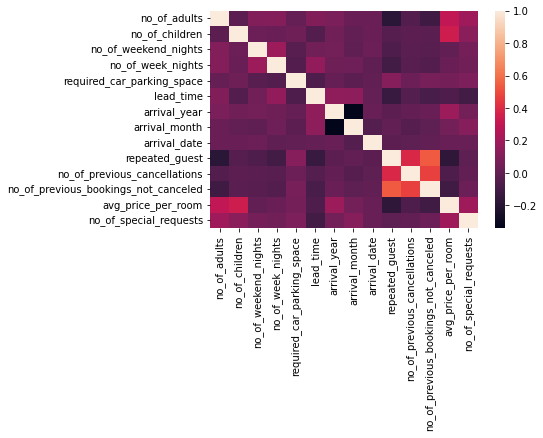

In [24]:
sns.heatmap(corr)

### Qs 3:

Given the string shown below

```python
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)
```
a.) Write a RegEx pattern that displays all the valid:

    i.) URLs

    ii.) phone numbers (11 or more digits)

b.) Given the array shown below:

```python
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))
```

i.) write a code that **normalizes** the array, `A` using:

$$
x_{new} = \frac{x_{i} - x_{min}}{x_{max} - x_{min}}
$$

* Return the **descriptive statistics** of the normalized array.

ii.) Create **histogram** of the normalized array, `A`

In [25]:
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)

In [26]:
# 3ai Enter your solution here

re.findall(r'(https?://\S+)', my_string)

['https://zadarma.com/en/tariffs/numbers/united-states/mobile/',
 'https://zadarma.com/en/tariffs/numbers/united-states/mobile/',
 'https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link']

In [27]:
# 3aii Enter your solution here

re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', my_string)

['+234) 287 576 3098', '808 576 8013', '803 5771 42', '+1-814-300-8859']

In [28]:
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))

In [29]:
# 3bi Enter your solution here

A_new = (A-np.min(A))/(np.max(A)-np.min(A))

A_new

array([[0.70407564, 0.83256166, 0.34042063, 0.02767826, 0.57760202],
       [0.13354498, 0.73124825, 0.34141214, 0.45797536, 0.99972388],
       [0.79669995, 0.86176472, 0.5603943 , 0.96389826, 0.        ],
       [0.90915482, 0.38776673, 0.22279939, 0.53876296, 0.96710213],
       [0.32642253, 0.92944687, 0.46875121, 0.99069336, 0.77870281],
       [0.79867079, 0.35829425, 0.59450476, 0.24034761, 0.81619372],
       [0.25076383, 0.68305658, 0.0595271 , 0.23859439, 0.35473738],
       [0.16049004, 0.25261035, 0.19154601, 0.02238063, 0.33881524],
       [0.46970965, 0.41657102, 0.91994953, 0.07365098, 0.63227372],
       [0.34494106, 0.007978  , 0.78786006, 0.42144097, 1.        ]])

In [30]:
pd.DataFrame(A_new).describe()

,0,1,2,3,4
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.489447,0.546130,0.448717,0.397542,0.646515
std,0.289048,0.304508,0.271435,0.354210,0.333582
min,0.133545,0.007978,0.059527,0.022381,0.000000
25%,0.269679,0.365662,0.252205,0.114887,0.410454
50%,0.407325,0.549814,0.405082,0.330894,0.705488
75%,0.773544,0.807233,0.585977,0.518566,0.929375
max,0.909155,0.929447,0.919950,0.990693,1.000000


(array([[0., 2., 1., 2., 1., 0., 0., 3., 0., 1.],
        [1., 0., 1., 2., 1., 0., 1., 1., 2., 1.],
        [1., 1., 1., 2., 1., 2., 0., 1., 0., 1.],
        [3., 0., 2., 0., 2., 1., 0., 0., 0., 2.],
        [1., 0., 0., 2., 0., 1., 1., 1., 1., 3.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 5 BarContainer objects>)

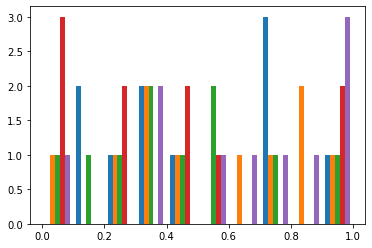

In [31]:
# 3bii Enter your solution here

plt.hist(A_new)

### Qs 4

#### The data can be found [here](https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link)

a.) Clean the following columns: `price`, `SSD(GB)`, `warranty(years)`, `Display(inch)` \
Note: Return numerical values for the cleaned columns with the corresponding unit as the appended to the column name. \
e.g. \
SSD(GB) retuns: \
`512 GB HDD|512 GB SSD`: `512` \
The Display(inch) retuns: \
`38.1 cm (15 inch) Display`: `15`

* You might need to create **new columns** with the corresponding **column names**.
* **To validate your result, run**:

```python
df[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)
```

b.) 

i.) Create a new column called `RAM_type` which extract the type of RAM. \
e.g. \
`32 GB LPDDR5 RAM`: `LPDDR5`

ii.) Create a new column called `is_SSD` which which checks whether the `RAM` is SSD or not. It returns `True` if it's an `SSD` otherwise, `False`

c.) Using the approriate column, create an new column called `Brand_name` by extracting the brand names. Validate your result by displaying the unique values in `Brand_name`

In [32]:
df = pd.read_csv("/content/laptops.csv")

df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Keyboard,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty


In [78]:
# 4a Enter your solution here

price = df.price.str.split('₹')[1]
warranty = df.warranty.str.split(' Year')[0]
ssd = df.SSD.str.split(' GB SSD')[0]
display = df['Display'].str.lower().str.extract("\((.*)\)")
display = display[0].str.split(" inch")
dl=[]
for i in display:
  dl.append(i)

df["price"] = price
df["warranty(years)"] = warranty
df["SSD(GB)"] = ssd
df["Display(inch)"] = dl

ValueError: ignored

In [77]:
df[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)

KeyError: ignored

In [ ]:
# 4bi Enter your solution here

In [67]:
# 4ci Enter your solution here

len(df.title.str.split(' ')[0])

21